In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [8]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.feature_names[0]

'pixel_0_0'

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
digits.DESCR[0]

'.'

<Figure size 432x288 with 0 Axes>

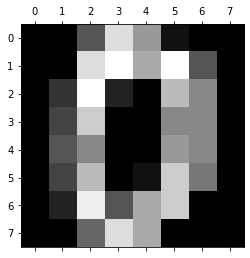

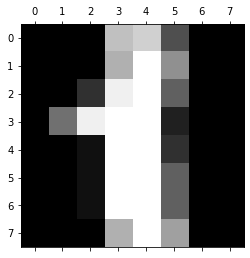

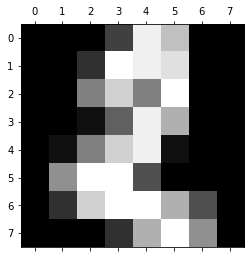

In [16]:
# This changes the default colormap as well as the colormap of the current image if there is one.
# matshow (A, fignum=None, **kwargs)[source] Display an array as a matrix in a new figure window
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [18]:
digits.target[0:3]

# these targets are the images shown or executed above

array([0, 1, 2])

In [19]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

> we use train test split so that it doesnt overfit & because we dont want our data to be bias against the train data , the data that the model is trained against should be different than the data the model is tested against

In [22]:
len(X_train)

1437

In [23]:
len(X_test)

360

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

> X_train will have hand written datasets in numerical numbers & Y_train will have the output of these handwritten numerical numbers 
Eg. hand written image 4 = target value is 4 

> X test will calculate the Y predicted value & it will compare those y predicted value against those y test variables from the original dataset 

In [32]:
model.score(X_test,y_test)

0.9694444444444444

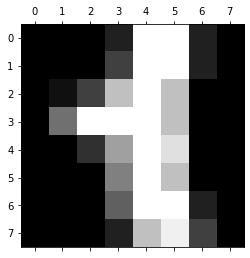

In [33]:
# for some reason 21 doesnt look like 21, we will see how to resolve it further

plt.matshow(digits.images[21])

In [34]:
digits.target[21]

1

> in coding you cant use the image attribute you have to use the numerical data attribute that made this image

> let's check if the model is predicting the target variable accurately as the output of the target data is 1 let's see if our model predicts the same this will show how accurate the model precisely is

In [35]:
model.predict([digits.data[21]])

array([1])

In [37]:
# it shud predict the same array that we loaded from the dataset above

model.predict(digits.data[0:3])

array([0, 1, 2])

For 21 to look like 21 & other similar problems to overcome we will use confusion Matrix     

In [41]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [39]:
# truth value ( original value from the dataset) , predicted value
confusion_matrix(y_test,y_predicted)

array([[38,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

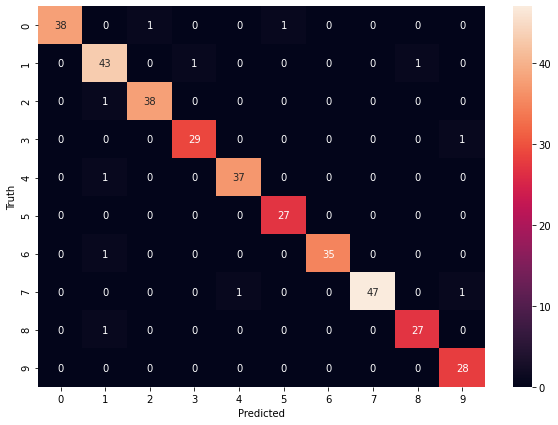

In [43]:
# visualizing this matrix in seaborn   
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Visualizing the confusion matrix 
1 time my truth was 8 but my model predicted it as 1 
1 time the truth was 4 but my model predicted it as 1
1 time my truth was 7 but my model predicted it as 4 
these are some instances where my model isn't doing good